# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection : Load the data set obtained from Kaggle

In [2]:
ride_share=pd.read_csv('C:/Users/unnat/OneDrive - Northeastern University/Data Mining/rideshare_kaggle.csv')
ride_share.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data Exploration

## Check the number of rows and columns

In [3]:
ride_share.shape

(693071, 57)

## This data set contains both Uber and Lyft records

In [4]:
ride_share['cab_type'].value_counts().to_frame()

,cab_type
Uber,385663
Lyft,307408


## We remove all the Uber that are Taxis

In [5]:
df = ride_share[ride_share['name'] != 'Taxi']
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Check if there are missing values after filtering process was successful

In [6]:
df['cab_type'].value_counts().to_frame()

,cab_type
Uber,330568
Lyft,307408


In [7]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## Check the number of rows and columns

In [8]:
df.shape

(637976, 57)

## View the columns

In [9]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

## Check the data types

In [10]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

# Data Visualization

## Monthly Count of Cabs

In [11]:
df_uber=df[df['cab_type'].isin(['Uber'])]
df_lyft=df[df['cab_type'].isin(['Lyft'])]

Text(0.5, 1.0, 'Monthly Count of Lyft')

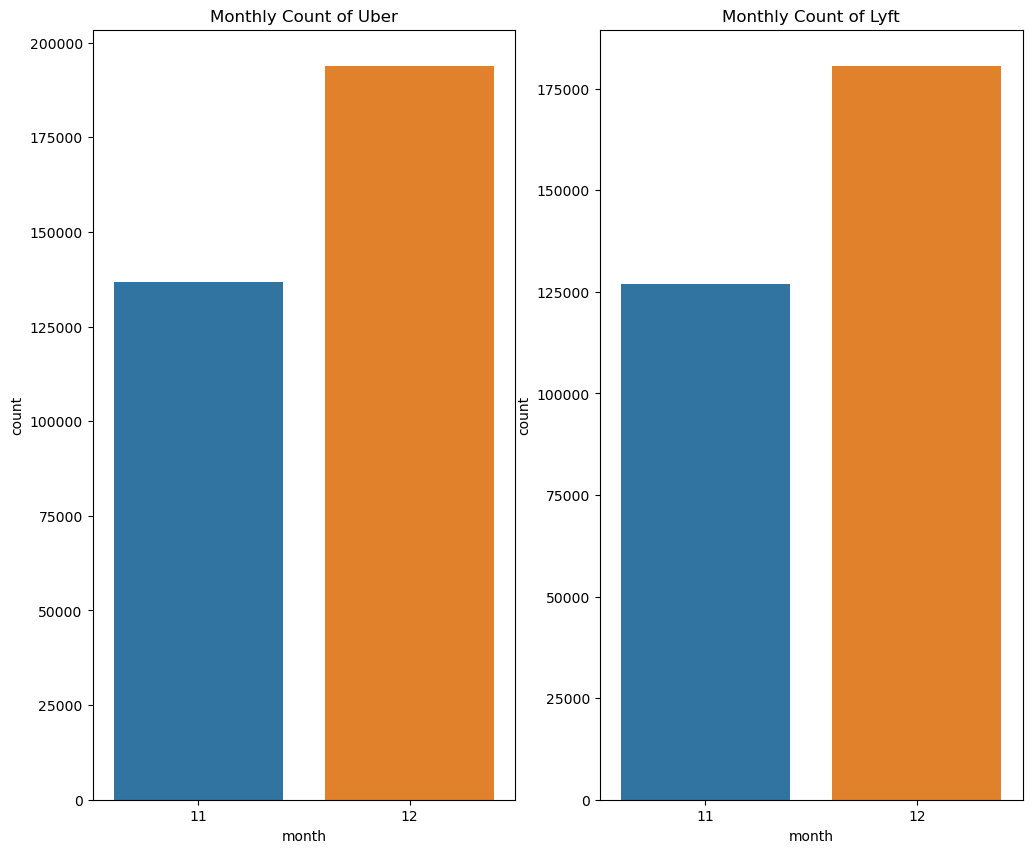

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))

fig1 = sns.countplot(ax=axes[0],x="month", data=df_uber)
axes[0].set_title('Monthly Count of Uber')
fig2 = sns.countplot(ax=axes[1],x="month", data=df_lyft)
axes[1].set_title('Monthly Count of Lyft')

From the above count plot, we observe the following: 
1. The booking records are the months of November and December
2. We have 136846 records for November for Uber
3. We have 193722 records for December for Uber
4. We have 126925 records for November for Lyft
5. We have 180483 records for December for Lyft

## Destination and Source Location for cabs

Text(0.5, 1.0, 'Locations of Lyft')

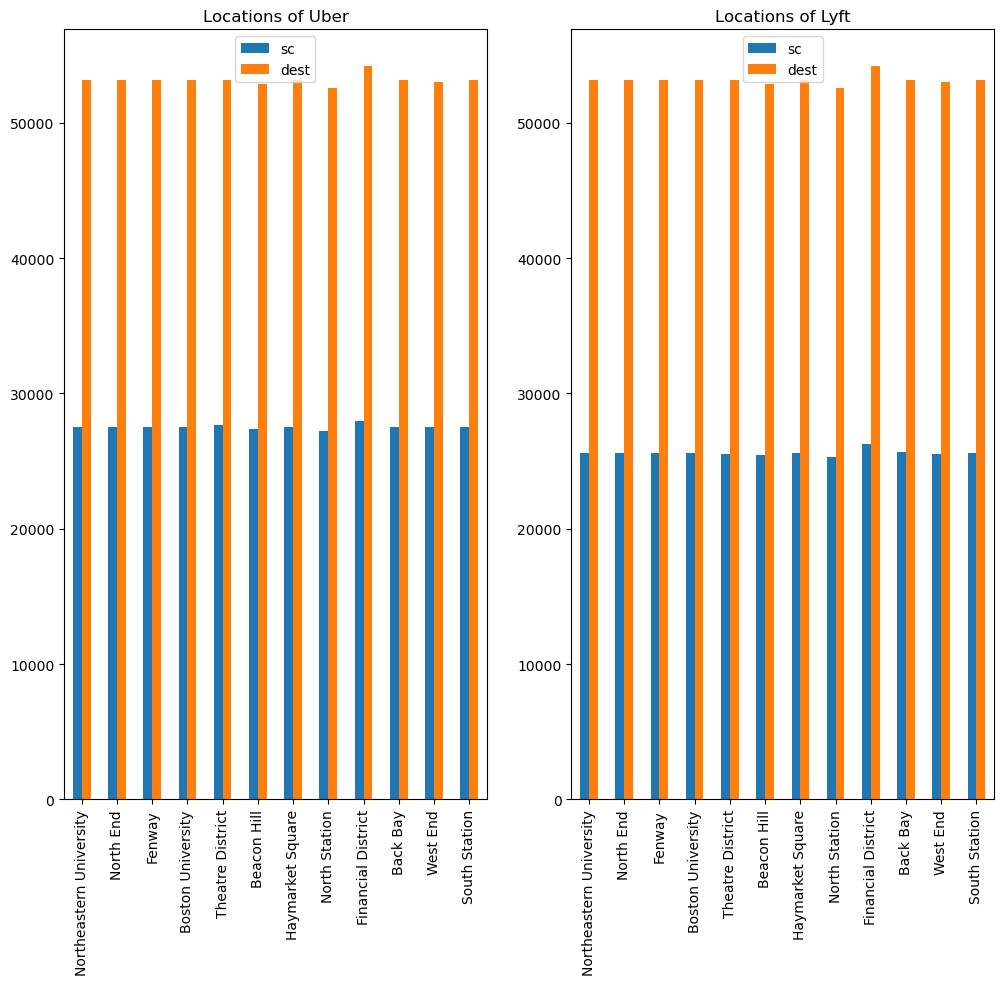

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))
data_u = {'sc': df_uber['source'].value_counts(),'dest': df['destination'].value_counts(),}
fig2 = pd.DataFrame(data_u,columns=['sc','dest'], index = ['Northeastern University','North End','Fenway','Boston University','Theatre District','Beacon Hill','Haymarket Square',
'North Station','Financial District','Back Bay','West End','South Station'])
fig2.plot.bar(ax=axes[0])
axes[0].set_title('Locations of Uber')

data_l = {'sc': df_lyft['source'].value_counts(),'dest': df['destination'].value_counts(),}
fig1 = pd.DataFrame(data_l,columns=['sc','dest'], index = ['Northeastern University','North End','Fenway','Boston University','Theatre District','Beacon Hill','Haymarket Square',
'North Station','Financial District','Back Bay','West End','South Station'])
fig1.plot.bar(ax=axes[1])
axes[1].set_title('Locations of Lyft')

From the above side-by-side bar chart, we observe that:

FOR UBER:
1. Maximum cabs were booked from Back Bay (27546 cabs)
2. Minimum cabs were booked from West End (27492 cabs)
3. Maximum cabs were booked to Financial District (27954 cabs)
4. Minimum cabs were booked to North Station (27251 cabs)

FOR LYFT:
1. Maximum cabs were booked from Financial District (26237 cabs)
2. Minimum cabs were booked from North Station (25326 cabs)
3. Maximum cabs were booked to Financial District (26238 cabs)
4. Minimum cabs were booked to North Station (25326 cabs)

## Distribution of Cab Types

Text(0.5, 1.0, 'Distribution of Uber Cab-Types')

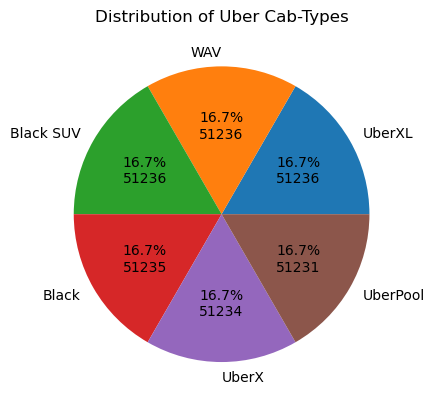

In [14]:
total = df_lyft['name'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df_uber['name'].value_counts().values, labels=df_uber['name'].value_counts().index, autopct=fmt)
plt.title('Distribution of Uber Cab-Types')

Text(0.5, 1.0, 'Distribution of Lyft Cab-Types')

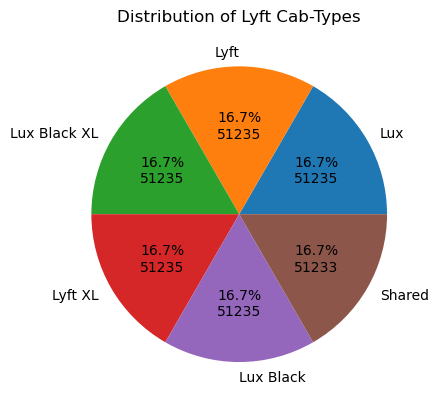

In [15]:
total = df_lyft['name'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df_lyft['name'].value_counts().values, labels=df_lyft['name'].value_counts().index, autopct=fmt)
plt.title('Distribution of Lyft Cab-Types')

From the above pie-chart, we observe that:
1. An equal proportion of all the different types of cabs were booked

## Cabs booked under each climate

Text(0.5, 1.0, 'Number of Lyft booked for each Climate')

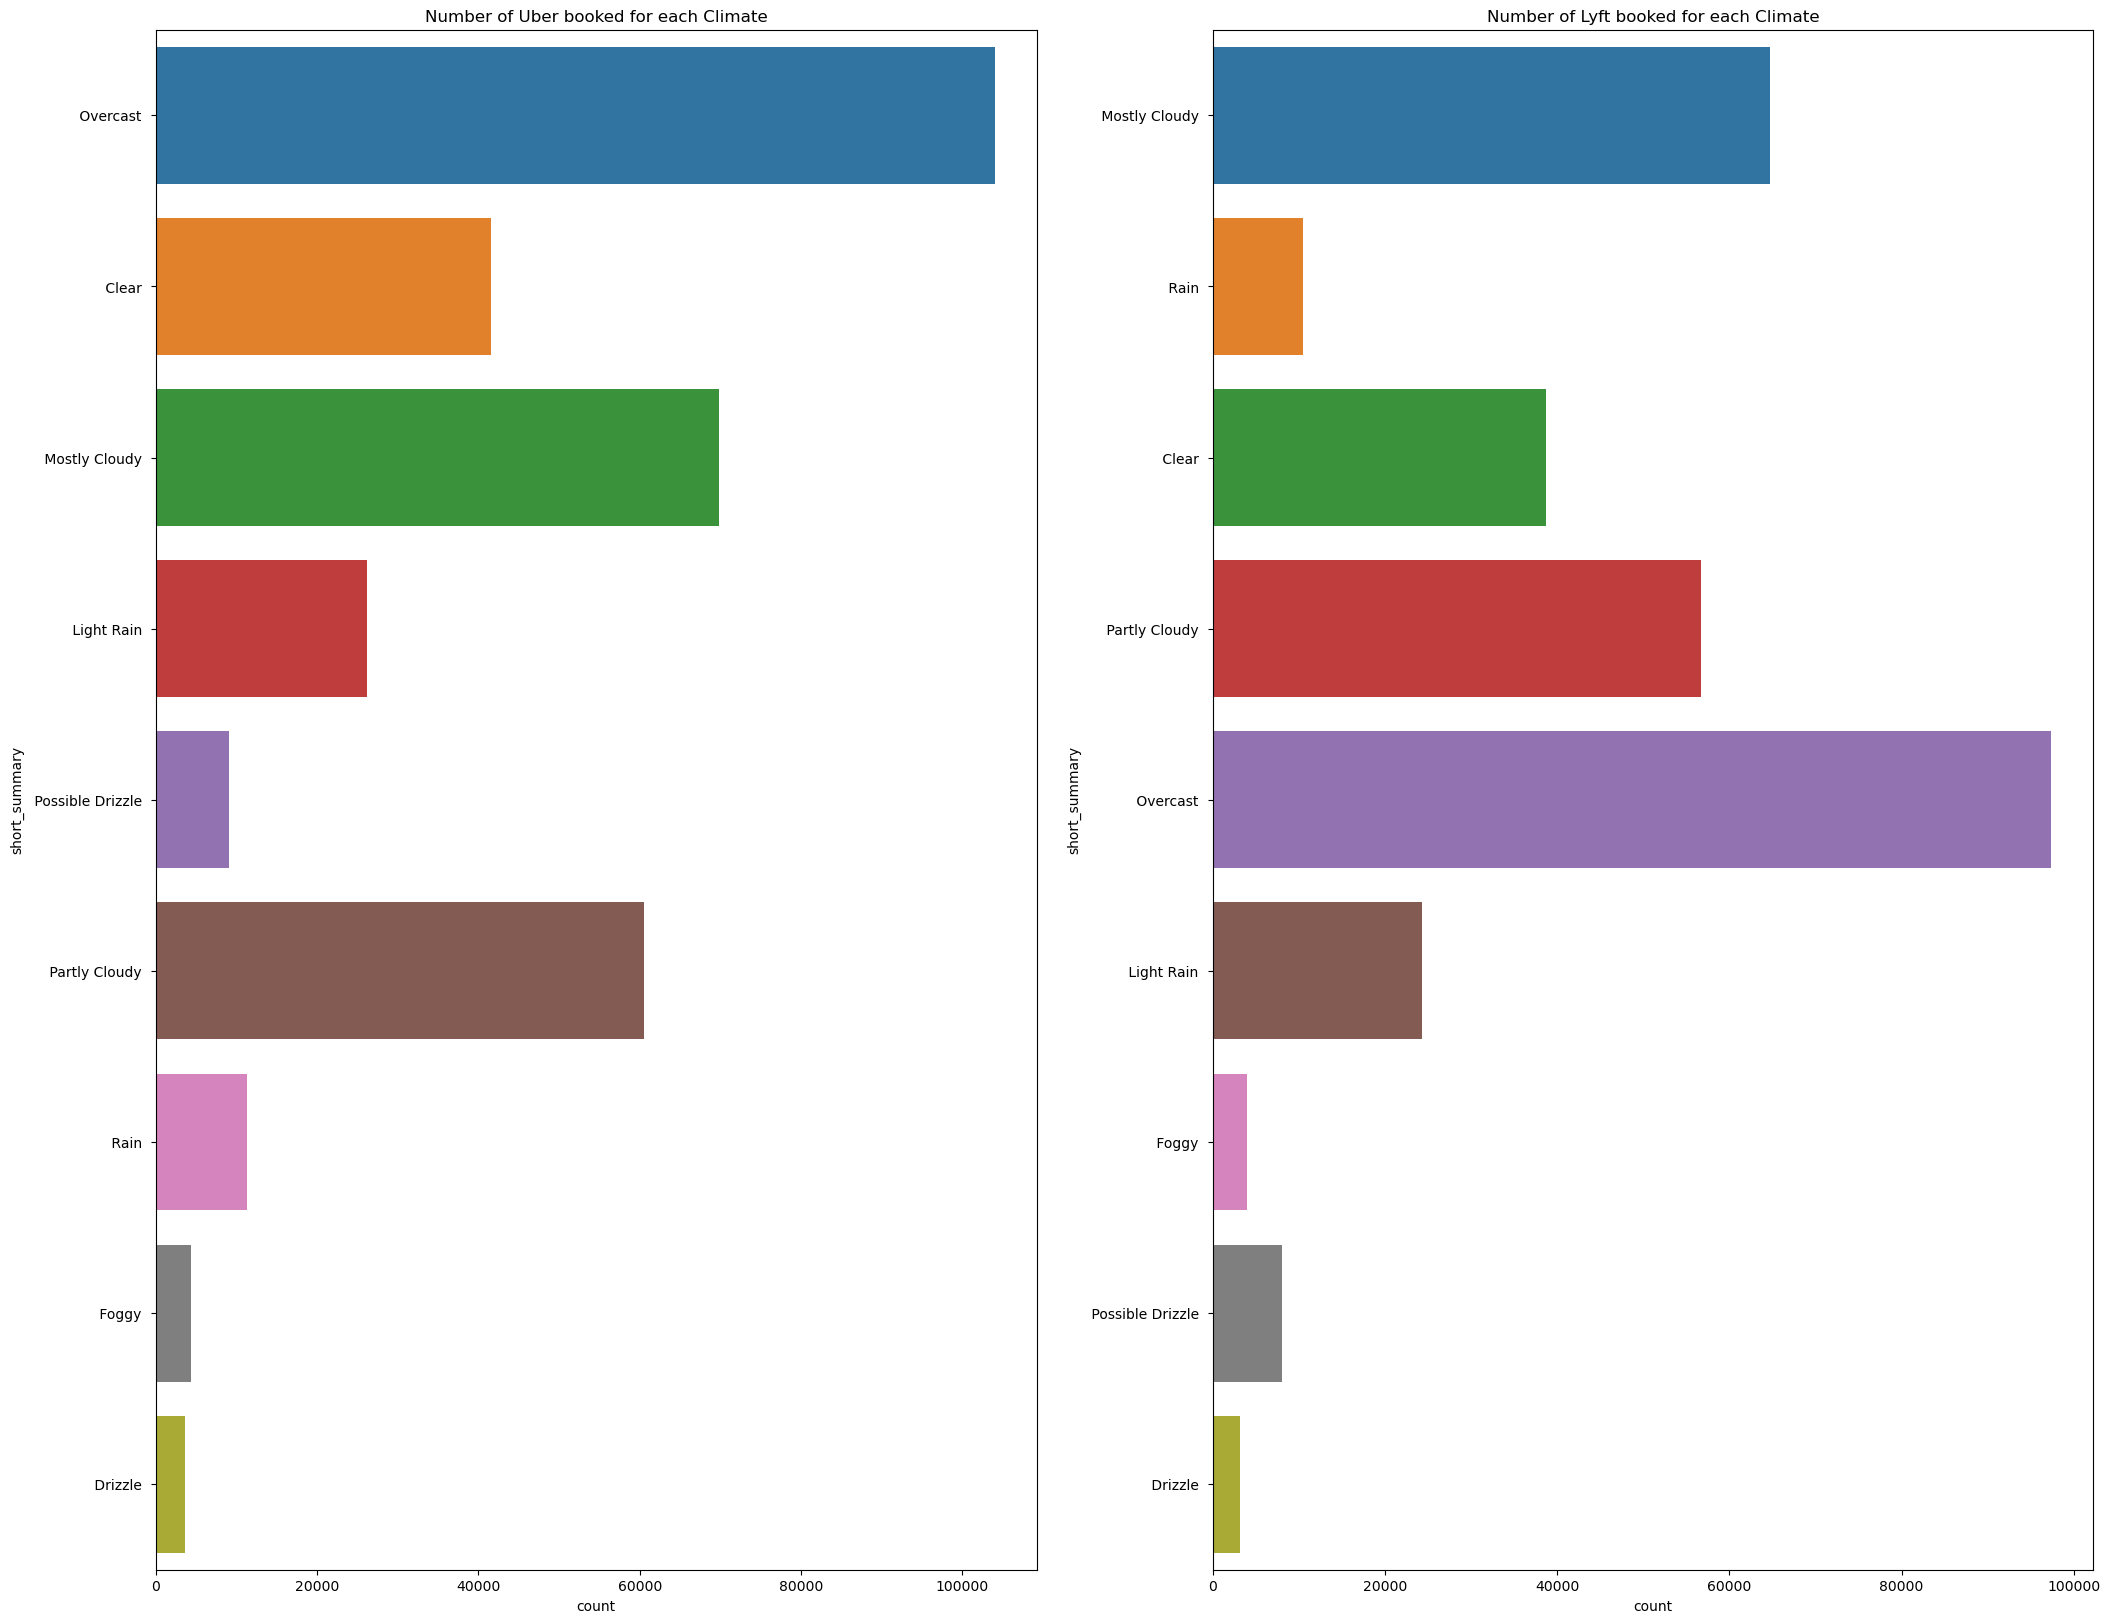

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(25,20))

fig1 = sns.countplot(ax=axes[0],y="short_summary", data=df_uber)
axes[0].set_title('Number of Uber booked for each Climate')
fig2 = sns.countplot(ax=axes[1],y="short_summary", data=df_lyft)
axes[1].set_title('Number of Lyft booked for each Climate')

## Surge Mutliplier for Uber and Lyft

[Text(0.5, 1.0, 'Surge Multiplier for each Cab Services')]

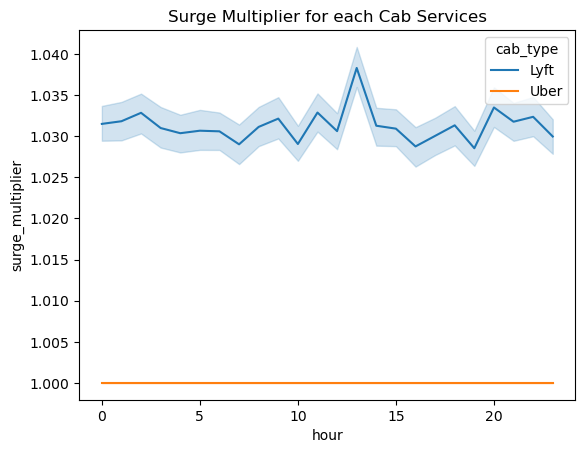

In [17]:
sns.lineplot(data=df, x="hour", y="surge_multiplier",hue='cab_type').set(title='Surge Multiplier for each Cab Services')

From the above lineplot, we observe that:
1. The surge multiplier remains the same throughout the day for Uber.
2. The surge multiplier is highest in the afternoon for Lyft

## Price and Distance distribution for Uber and Lyft each cab type

Text(0.5, 0.98, 'Distribution of Distance VS Price for Uber Cab Type')

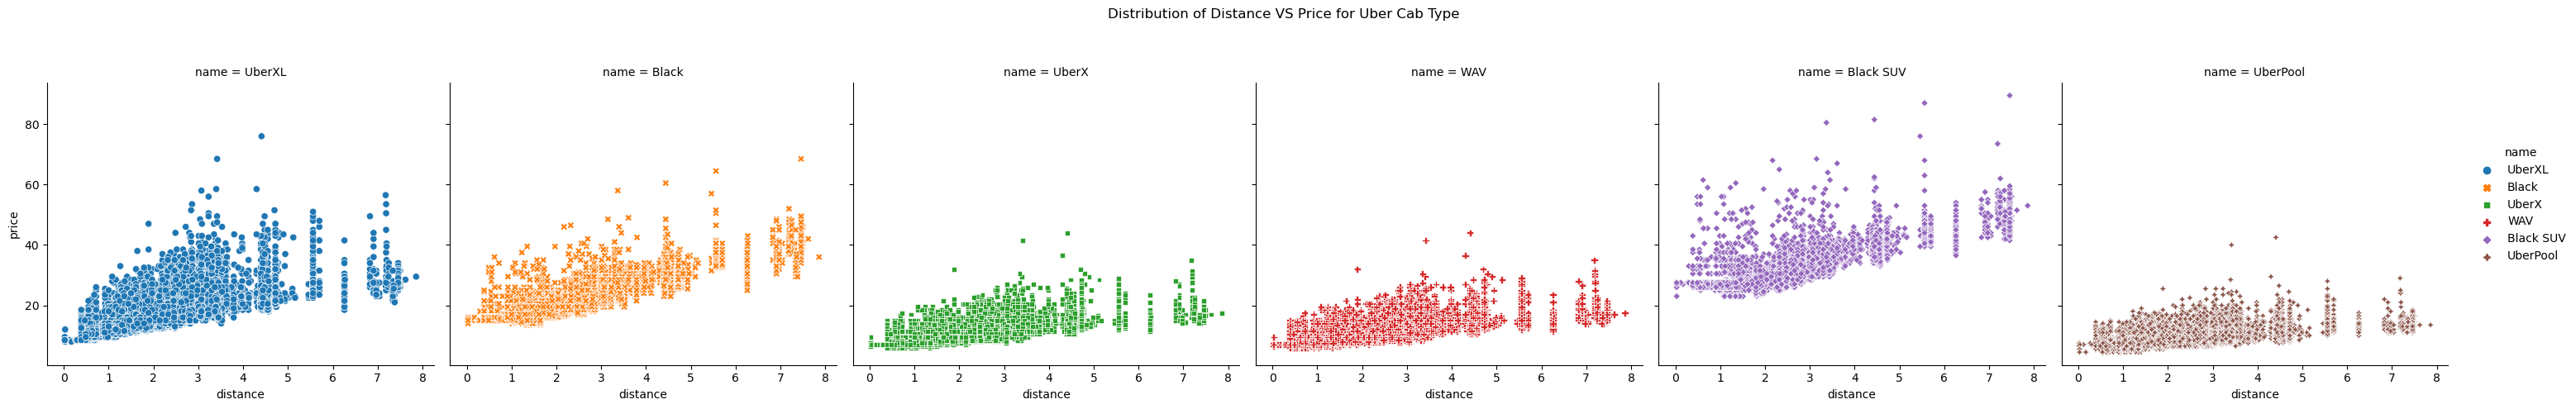

In [18]:
rel = sns.relplot(data=df_uber, x="distance", y="price", col="name", hue="name", style="name",kind="scatter")
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Distribution of Distance VS Price for Uber Cab Type')

Text(0.5, 0.98, 'Distribution of Distance VS Price for Lyft Cab Type')

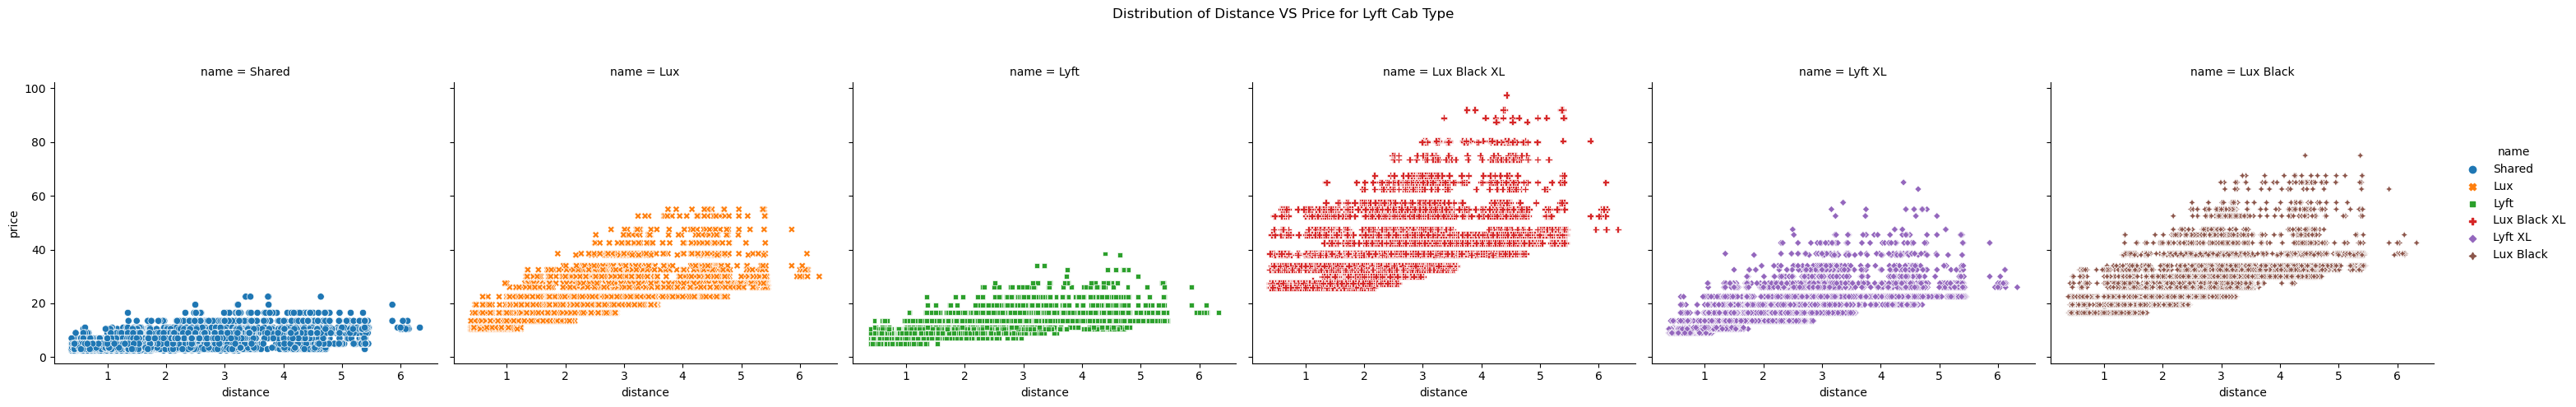

In [19]:
rel = sns.relplot(data=df_lyft, x="distance", y="price", col="name", hue="name", style="name",kind="scatter")
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Distribution of Distance VS Price for Lyft Cab Type')

## Price distribution for Uber and Lyft each cab type

Text(0.5, 0.98, 'Distribution of Price for Uber Cab Type')

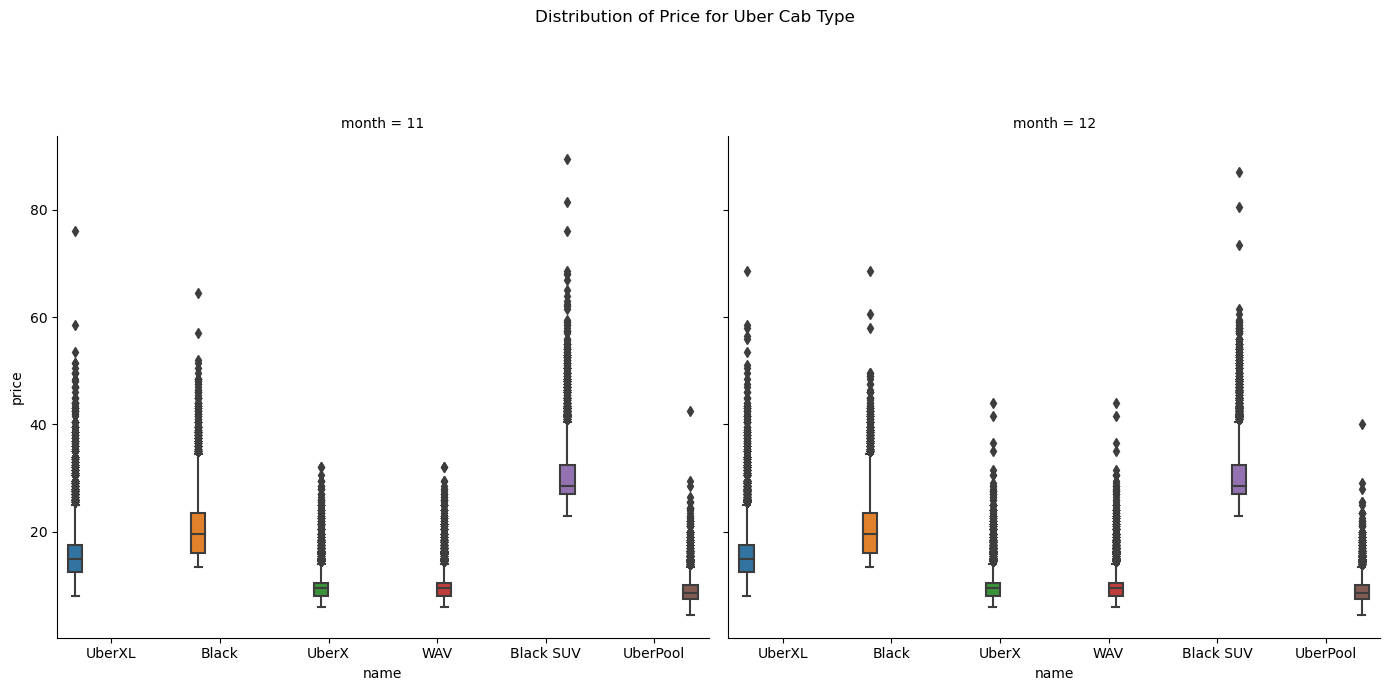

In [20]:
fig3 = sns.catplot(x="name", y="price", hue="name", col="month", data=df_uber, kind="box", height=7, aspect=1)
fig3.fig.subplots_adjust(top=.8)
fig3.fig.suptitle('Distribution of Price for Uber Cab Type')

The above boxplot for Uber show that:
1. Black SUV seems the most expensive and booking with high prices among the other type of cabs.
2. UberPool, WAV, UberX looks like the cheapest option as they have similar low range pattern.

Text(0.5, 0.98, 'Distribution of Price for Lyft Cab Type')

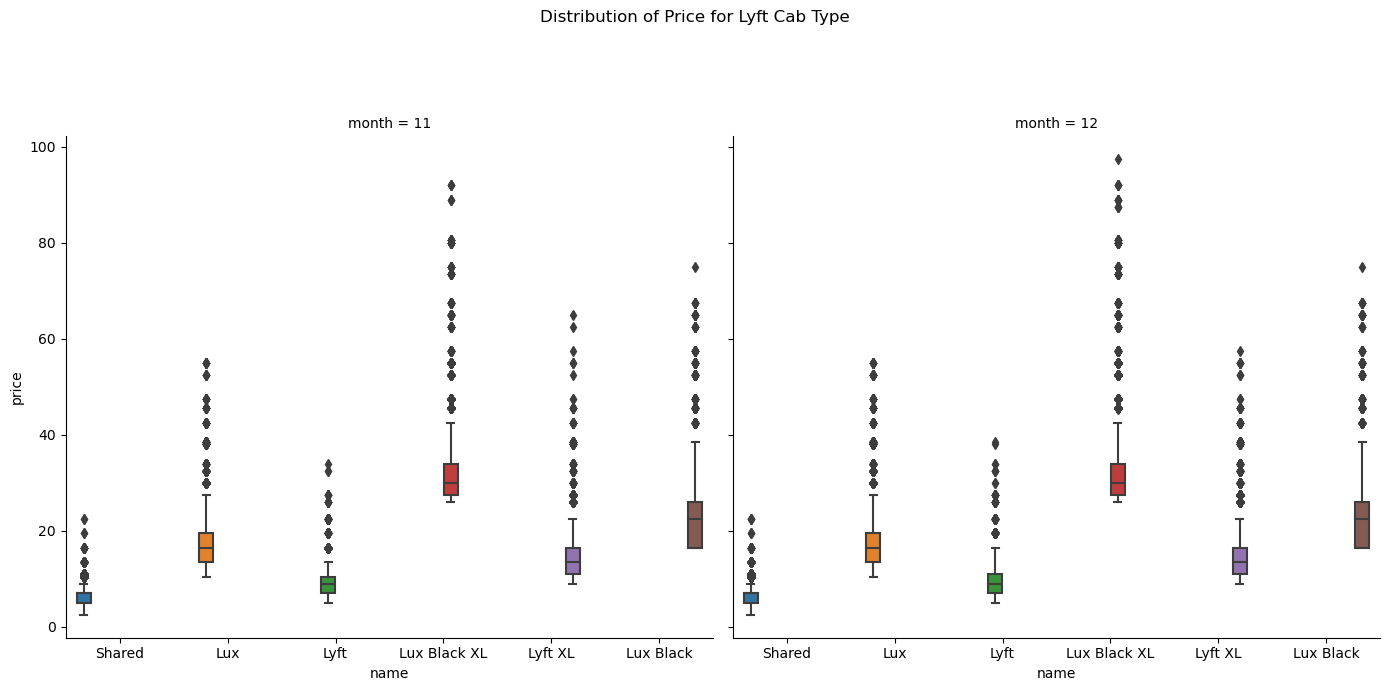

In [21]:
fig3 = sns.catplot(x="name", y="price", hue="name", col="month", data=df_lyft, kind="box", height=7, aspect=1)
fig3.fig.subplots_adjust(top=.8)
fig3.fig.suptitle('Distribution of Price for Lyft Cab Type')

The above boxplot for Lyft shows that:
1. Lux Black XL seems the most expensive and booking with high prices among the other type of cabs.
2. Shared looks like the cheapest option as they have similar low range.

## Heatmaps

[Text(0.5, 1.0, 'Heatmap')]

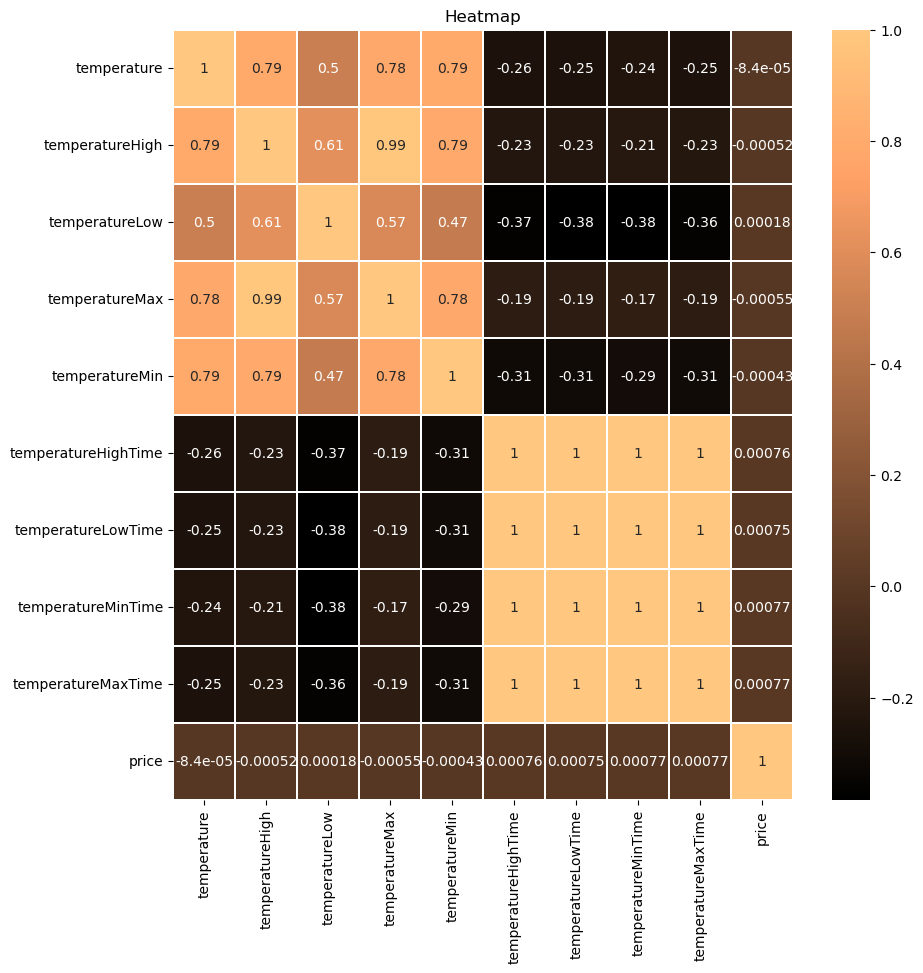

In [22]:
df1= df[['temperature','temperatureHigh','temperatureLow','temperatureMax','temperatureMin','temperatureHighTime','temperatureLowTime','temperatureMinTime','temperatureMaxTime','price']]
corl=df1.corr()
#Set the plot size
fig,ax = plt.subplots(figsize=(10,10))
#Plot the heat map
sns.heatmap(corl, xticklabels=corl.columns, yticklabels=corl.columns, linewidth=0.2, annot=True, cmap="copper").set(title='Heatmap')

From the above correlation heatmap, we observe that the following features have no effect on the price and can thus be eliminated:
1. temperature
2. temperatureHigh
3. temperatureLow
4. temperatureMax
5. temperatureMin
6. temperatureHighTime
7. temperatureLowTime
8. temperatureMinTime
9. temperatureMaxTime

[Text(0.5, 1.0, 'Heatmap')]

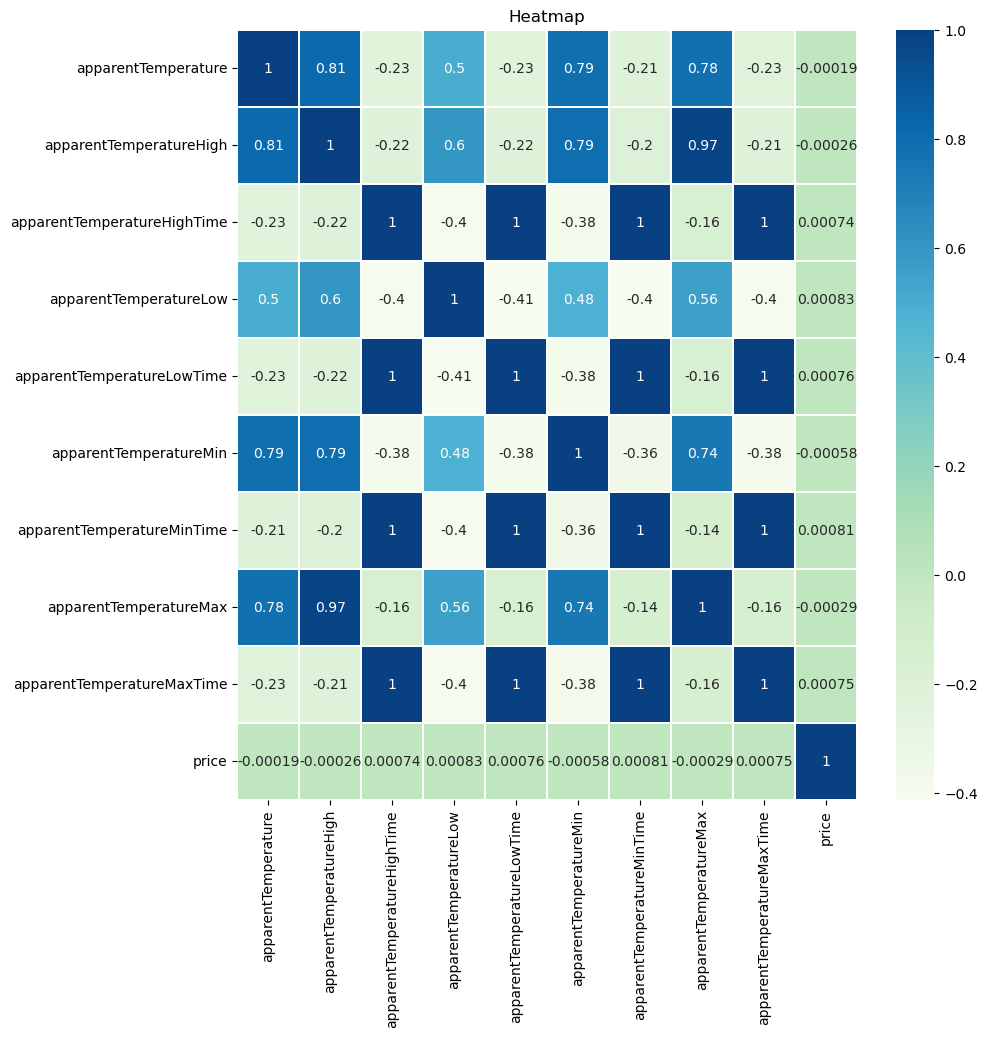

In [23]:
df2= df[['apparentTemperature','apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime','price']]
corl1=df2.corr()
#Set the plot size
fig,ax = plt.subplots(figsize=(10,10))
#Plot the heat map
sns.heatmap(corl1, xticklabels=corl1.columns, yticklabels=corl1.columns, linewidth=0.2, annot=True, cmap="GnBu").set(title='Heatmap')

From the above correlation heatmap, we observe that the following features have no effect on the price and can thus be eliminated:
1. apparentTemperature
2. apparentTemperatureHigh
3. apparentTemperatureLow
4. apparentTemperatureMax
5. apparentTemperatureMin
6. apparentTemperatureHighTime
7. apparentTemperatureLowTime
8. apparentTemperatureMinTime
9. apparentTemperatureMaxTime

[Text(0.5, 1.0, 'Heatmap')]

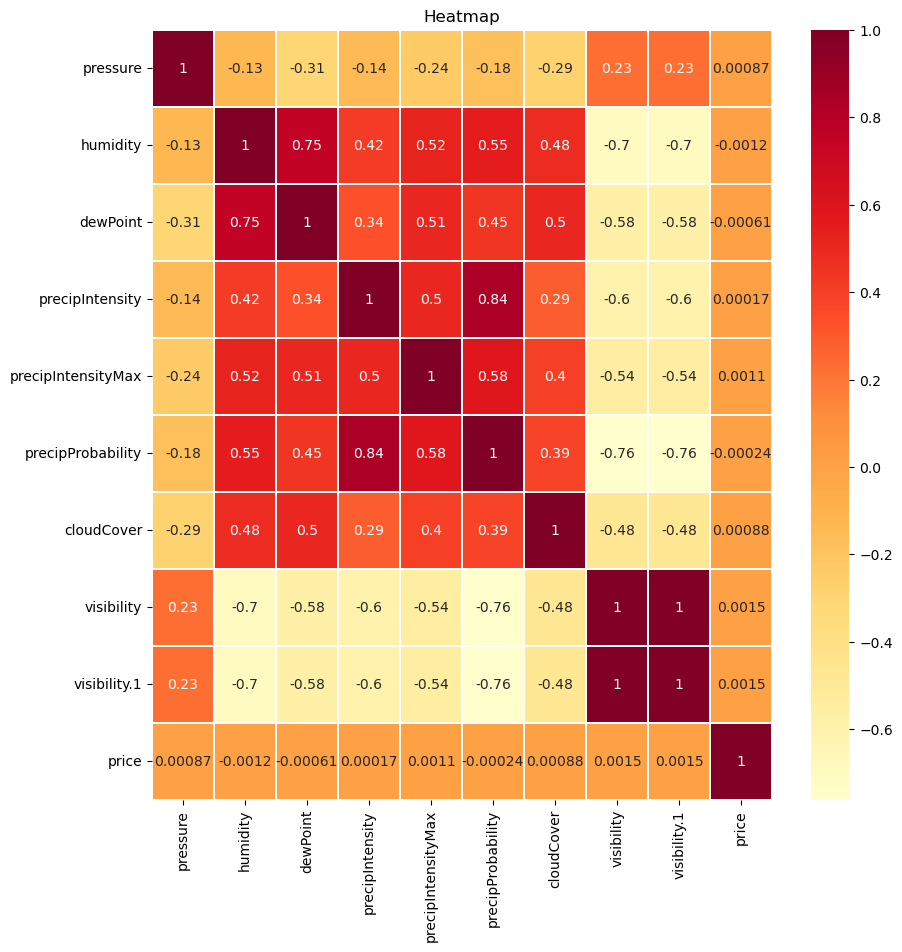

In [24]:
df3= df[['pressure','humidity','dewPoint','precipIntensity','precipIntensityMax','precipProbability','cloudCover','visibility','visibility.1','price']]
cor2=df3.corr()
#Set the plot size
fig,ax = plt.subplots(figsize=(10,10))
#Plot the heat map
sns.heatmap(cor2, xticklabels=cor2.columns, yticklabels=cor2.columns, linewidth=0.2, annot=True, cmap="YlOrRd").set(title='Heatmap')

From the above correlation heatmap, we observe that the following features have no effect on the price and can thus be eliminated:
1. pressure
2. humidity
3. dewPoint
4. precipIntensity
5. precipProbability
6. visibility
7. visibility.1
8. cloudCover

[Text(0.5, 1.0, 'Heatmap')]

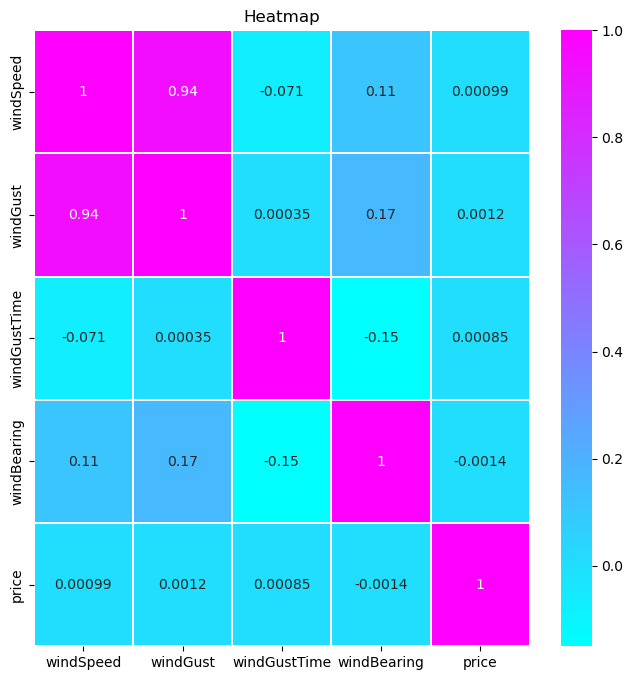

In [25]:
df4= df[['windSpeed','windGust','windGustTime','windBearing','price']]
cor3=df4.corr()
#Set the plot size
fig,ax = plt.subplots(figsize=(8,8))
#Plot the heat map
sns.heatmap(cor3, xticklabels=cor3.columns, yticklabels=cor3.columns, linewidth=0.2, annot=True, cmap="cool").set(title='Heatmap')

From the above correlation heatmap, we observe that the following features have no effect on the price and can thus be eliminated:
1. windSpeed
2. windGust
3. windGustTime
4. windBearing

[Text(0.5, 1.0, 'Heatmap')]

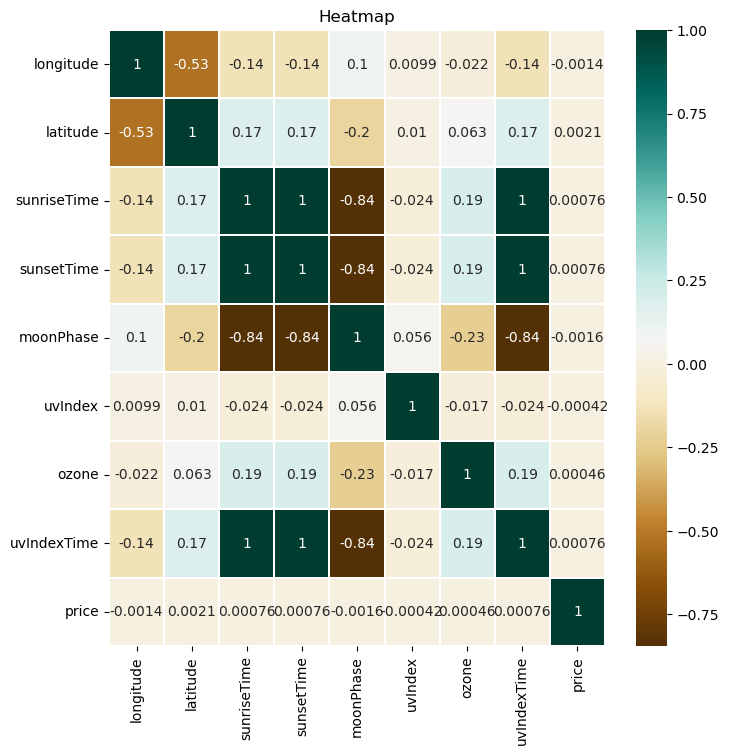

In [26]:
df5= df[['longitude','latitude','sunriseTime','sunsetTime','moonPhase','uvIndex','ozone','uvIndexTime','price']]
cor4=df5.corr()
#Set the plot size
fig,ax = plt.subplots(figsize=(8,8))
#Plot the heat map
sns.heatmap(cor4, xticklabels=cor4.columns, yticklabels=cor4.columns, linewidth=0.2, annot=True, cmap="BrBG").set(title='Heatmap')

From the above correlation heatmap, we observe that the following features have no effect on the price and can thus be eliminated:
1. longitude
2. latitude
3. sunriseTime
4. sunsetTime
5. moonPhase
6. uvIndex
7. ozone
8. uvIndexTime

# Data Preprocessing

## Drop columns with no correlation with price based on the correlation heatmaps

In [27]:
newdf= df.drop(['id','temperature','temperatureHigh','temperatureLow','temperatureMax','temperatureMin','temperatureHighTime','temperatureLowTime','temperatureMinTime','temperatureMaxTime','apparentTemperature','apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime','pressure','humidity','dewPoint','precipIntensity','precipIntensityMax','precipProbability','visibility','visibility.1','windSpeed','windGust','windGustTime','windBearing','longitude','latitude','sunriseTime','sunsetTime','moonPhase','uvIndex','uvIndexTime','ozone','cloudCover'], axis=1)

In [28]:
newdf.dtypes

timestamp           float64
hour                  int64
day                   int64
month                 int64
datetime             object
timezone             object
source               object
destination          object
cab_type             object
product_id           object
name                 object
price               float64
distance            float64
surge_multiplier    float64
short_summary        object
long_summary         object
icon                 object
dtype: object

## Label Encoding

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [30]:
newdf['datetime']= label_encoder.fit_transform(newdf['datetime']) 
newdf['destination']= label_encoder.fit_transform(newdf['destination']) 
newdf['product_id']= label_encoder.fit_transform(newdf['product_id'])
newdf['short_summary']= label_encoder.fit_transform(newdf['short_summary'])
newdf['long_summary']= label_encoder.fit_transform(newdf['long_summary'])

In [31]:
newdf['name']= label_encoder.fit_transform(newdf['name'])

print("Mapping: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, ":", i)

Mapping: 
Black : 0
Black SUV : 1
Lux : 2
Lux Black : 3
Lux Black XL : 4
Lyft : 5
Lyft XL : 6
Shared : 7
UberPool : 8
UberX : 9
UberXL : 10
WAV : 11


In [32]:
newdf['source']= label_encoder.fit_transform(newdf['source'])

print("Mapping: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, ":", i)

Mapping: 
Back Bay : 0
Beacon Hill : 1
Boston University : 2
Fenway : 3
Financial District : 4
Haymarket Square : 5
North End : 6
North Station : 7
Northeastern University : 8
South Station : 9
Theatre District : 10
West End : 11


In [33]:
newdf['icon']= label_encoder.fit_transform(newdf['icon'])

print("Mapping: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, ":", i)

Mapping: 
 clear-day  : 0
 clear-night  : 1
 cloudy  : 2
 fog  : 3
 partly-cloudy-day  : 4
 partly-cloudy-night  : 5
 rain  : 6


In [34]:
newdf.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,long_summary,icon
0,1.544953e+09,9,16,12,25351,America/New_York,5,7,Lyft,7,7,5.0,0.44,1.0,4,9,5
1,1.543284e+09,2,27,11,961,America/New_York,5,7,Lyft,11,2,11.0,0.44,1.0,8,10,6
2,1.543367e+09,1,28,11,2534,America/New_York,5,7,Lyft,6,5,7.0,0.44,1.0,0,2,1
3,1.543554e+09,4,30,11,6988,America/New_York,5,7,Lyft,9,4,26.0,0.44,1.0,0,6,1
4,1.543463e+09,3,29,11,4400,America/New_York,5,7,Lyft,10,6,9.0,0.44,1.0,6,4,5


Timezone is same for all the records -- Boston. Hence, we can eliminate it.

In [35]:
newdf = newdf.drop('timezone', axis=1)

In [36]:
newdf['price'] = newdf['price'].astype(int)

<AxesSubplot:>

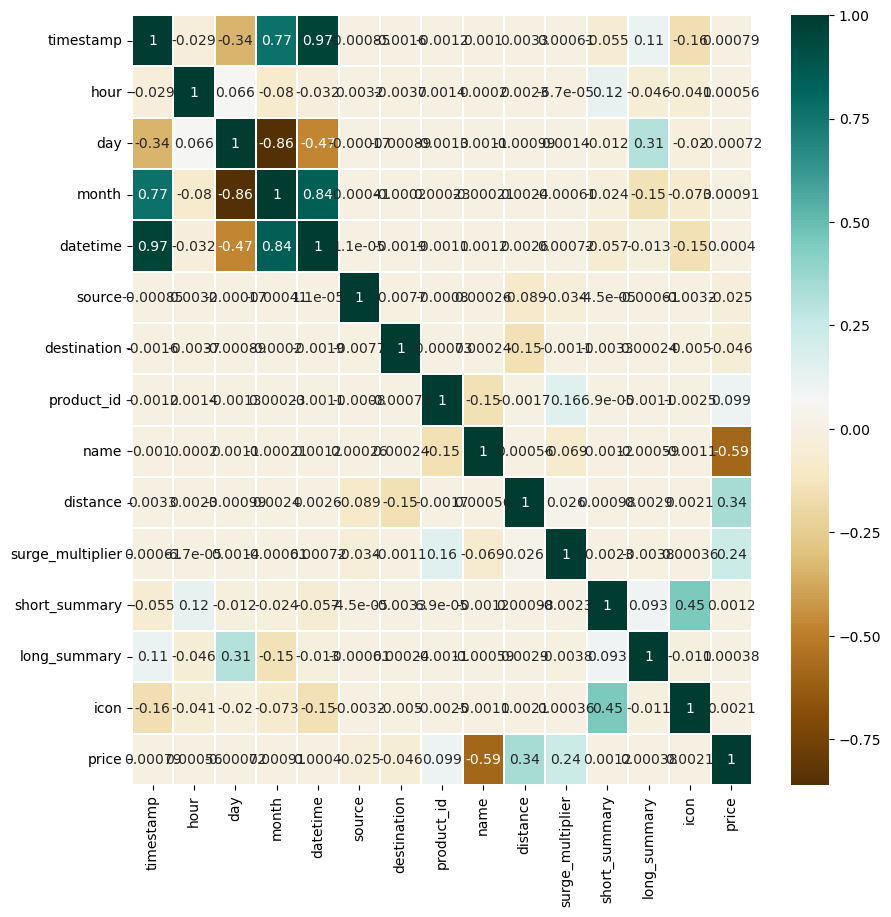

In [37]:
df5= newdf[['timestamp','hour','day','month','datetime','source','destination','product_id','name','distance','surge_multiplier','short_summary','long_summary','icon','price']]
cor4=df5.corr()
#Set the plot size
fig,ax = plt.subplots(figsize=(10,10))
#Plot the heat map
sns.heatmap(cor4, xticklabels=cor4.columns, yticklabels=cor4.columns, linewidth=0.2, annot=True, cmap="BrBG")

The predictors do not seem to be highly correlated. Hence, dimensionality reduction is not possible. Only the time related variables are correlated but for the analysis purpose we need to retain the variables as they are.

In [38]:
newdf_uber = newdf[newdf['cab_type'].isin(['Uber'])]
newdf_lyft = newdf[newdf['cab_type'].isin(['Lyft'])]

In [39]:
newdf_uber = newdf_uber.drop('cab_type',axis = 1)
newdf_lyft = newdf_lyft.drop('cab_type',axis = 1)

## Implementation of Recursive Feature Elimination for feature selection

In [40]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [41]:
# Recursive Feature Elimination
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [42]:
#Separate the features and the target
X_uber = newdf_uber.drop('price', axis=1)
y_uber = newdf_uber['price']

X_lyft = newdf_lyft.drop('price', axis=1)
y_lyft = newdf_lyft['price']

## Splitting the data set as 75% training set and 25% test set

In [43]:
from sklearn.model_selection import train_test_split
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(X_uber, y_uber, test_size=0.25, random_state= 42)
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(X_uber, y_uber, test_size=0.25, random_state= 42)

## Linear Regression

### Training accuracy for 14 features

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train_uber, y_train_uber)

In [45]:
reg.score(X_train_uber, y_train_uber)

0.6585204036341172

### Training accuracy for 10 features

In [46]:
rfe=RFE(reg, n_features_to_select=10)
rfe= rfe.fit(X_uber,y_uber)

In [47]:
rfe.support_

array([False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [48]:
XX1= X_train_uber[X_train_uber.columns[rfe.support_]]
XX1.head()

,day,month,source,destination,product_id,name,distance,short_summary,long_summary,icon
537360,2,12,4,2,3,10,4.44,3,3,6
417429,29,11,0,2,0,9,1.44,4,6,5
516999,29,11,10,8,5,11,1.80,4,6,5
75742,29,11,6,0,1,0,2.73,4,6,5
552390,27,11,1,8,1,0,1.97,3,2,6


In [49]:
reg1 = LinearRegression()
reg1 = reg1.fit(XX1, y_train_uber)

In [50]:
reg1.score(XX1, y_train_uber)

0.6585195246580935

### Training accuracy for 7 features

In [51]:
rfe= RFE(reg, n_features_to_select=7)
rfe= rfe.fit(X_uber,y_uber)

In [52]:
rfe.support_

array([False, False, False,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True])

In [53]:
XX2= X_train_uber[X_train_uber.columns[rfe.support_]]
XX2.head()

,month,source,product_id,name,distance,long_summary,icon
537360,12,4,3,10,4.44,3,6
417429,11,0,0,9,1.44,6,5
516999,11,10,5,11,1.80,6,5
75742,11,6,1,0,2.73,6,5
552390,11,1,1,0,1.97,2,6


In [54]:
reg1 = LinearRegression()
reg1 = reg1.fit(XX2, y_train_uber)

In [55]:
reg1.score(XX2, y_train_uber)

0.658515725914339

### Training accuracy for 4 features

In [56]:
rfe= RFE(reg, n_features_to_select=4)
rfe= rfe.fit(X_uber,y_uber)

In [57]:
rfe.support_

array([False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False])

In [58]:
XX3= X_train_uber[X_train_uber.columns[rfe.support_]]
XX3.head()

,source,product_id,name,distance
537360,4,3,10,4.44
417429,0,0,9,1.44
516999,10,5,11,1.80
75742,6,1,0,2.73
552390,1,1,0,1.97


In [59]:
reg1 = LinearRegression()
reg1 = reg1.fit(XX3, y_train_uber)

In [60]:
reg1.score(XX3, y_train_uber)

0.6585115441806066

On observing the training accuracy values for 14,10 and 7, we notice that the training accuracy is the most for 10 features in the linear regression model. Hence, we consider the 10 features. 

#### View the 10 features for Linear Regression

In [61]:
XX1.columns

Index(['day', 'month', 'source', 'destination', 'product_id', 'name',
       'distance', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

We can further eliminate features that have no correlation with the price as per the correlation heat map. Finally, we choose variables like distance, source, destination, name. 

In [62]:
X_train_uber1 = X_train_uber[['source','destination','name','distance']]
X_test_uber1 = X_test_uber[['source','destination','name','distance']]

### Model Implementation of Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
mod1= LinearRegression()
mod1.fit(X_train_uber1,y_train_uber)
mod1.score(X_test_uber1,y_test_uber)

0.6472784120632444

## Random Forest Regressor

### Training accuracy for 14 features

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg = reg.fit(X_train_uber, y_train_uber)

In [65]:
reg.score(X_train_uber, y_train_uber)

0.9912626989151038

### Training accuracy for 10 features

In [66]:
rfe=RFE(reg, n_features_to_select=10)
rfe= rfe.fit(X_uber,y_uber)

In [67]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False])

In [68]:
XX1= X_train_uber[X_train_uber.columns[rfe.support_]]
XX1.head()

,timestamp,hour,day,datetime,source,destination,product_id,name,distance,short_summary
537360,1.543749e+09,11,2,12551,4,2,3,10,4.44,3
417429,1.543471e+09,5,29,4543,0,2,0,9,1.44,4
516999,1.543480e+09,8,29,4814,10,8,5,11,1.80,4
75742,1.543476e+09,7,29,4714,6,0,1,0,2.73,4
552390,1.543311e+09,9,27,1445,1,8,1,0,1.97,3


In [72]:
reg1 = RandomForestRegressor()
reg1 = reg1.fit(XX1, y_train_uber)

In [73]:
reg1.score(XX1, y_train_uber)

0.991296202205894

### Training accuracy for 7 features

In [74]:
rfe= RFE(reg, n_features_to_select=7)
rfe= rfe.fit(X_uber,y_uber)

In [75]:
rfe.support_

array([ True,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False])

In [76]:
XX2= X_train_uber[X_train_uber.columns[rfe.support_]]
XX2.head()

,timestamp,hour,datetime,destination,product_id,name,distance
537360,1.543749e+09,11,12551,2,3,10,4.44
417429,1.543471e+09,5,4543,2,0,9,1.44
516999,1.543480e+09,8,4814,8,5,11,1.80
75742,1.543476e+09,7,4714,0,1,0,2.73
552390,1.543311e+09,9,1445,8,1,0,1.97


In [77]:
reg1 = RandomForestRegressor()
reg1 = reg1.fit(XX2, y_train_uber)

In [78]:
reg1.score(XX2, y_train_uber)

0.9911922737602726

### Training accuracy for 4 features

In [79]:
rfe= RFE(reg, n_features_to_select=4)
rfe= rfe.fit(X_uber,y_uber)

In [80]:
rfe.support_

array([False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False])

In [81]:
XX3= X_train_uber[X_train_uber.columns[rfe.support_]]
XX3.head()

,datetime,product_id,name,distance
537360,12551,3,10,4.44
417429,4543,0,9,1.44
516999,4814,5,11,1.80
75742,4714,1,0,2.73
552390,1445,1,0,1.97


In [82]:
reg1 = RandomForestRegressor()
reg1 = reg1.fit(XX3, y_train_uber)

In [83]:
reg1.score(XX3, y_train_uber)

0.9902201335249241

On observing the training accuracy values for 14,10, 7 and 4, we notice that the training accuracy is the most for 10 features in the Random Forest Regression model. Hence, we consider the 10 features. 

#### View the 10 features for Random Forest Regression

In [84]:
XX1.columns

Index(['timestamp', 'hour', 'day', 'datetime', 'source', 'destination',
       'product_id', 'name', 'distance', 'short_summary'],
      dtype='object')

We can further eliminate features that have no correlation with the price as per the correlation heat map. Finally, we choose variables like distance, source, destination, name. 

In [85]:
X_train_uber2 = X_train_uber[['source','destination','name','distance']]
X_test_uber2 = X_test_uber[['source','destination','name','distance']]

### Model Implementation of Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
mod3= RandomForestRegressor(n_estimators=120, random_state=0)
mod3.fit(X_train_uber2,y_train_uber)
mod3.score(X_test_uber2,y_test_uber)

0.9513875443312758

## Ridge Regression

In [88]:
from sklearn.linear_model import Ridge
mod4=Ridge(alpha=0.5, tol=0.001, solver='auto', random_state=42)
mod4.fit(X_train_uber1, y_train_uber)
mod4.score(X_test_uber1, y_test_uber)

0.6472784215898566

## Lasso Regression

In [89]:
from sklearn import linear_model
mod5=linear_model.Lasso().fit(X_train_uber1, y_train_uber)
mod5.score(X_test_uber1, y_test_uber)

0.6386667466481426

## ElasticNet Regression

In [90]:
from sklearn.linear_model import ElasticNet
mod6=ElasticNet().fit(X_train_uber1, y_train_uber)
mod6.score(X_test_uber1, y_test_uber)

0.6328120469949317

## XGBoost Regressor

In [91]:
!pip install xgboost

In [92]:
import xgboost as xgb

In [93]:
reg = xgb.XGBRegressor()
reg = reg.fit(X_train_uber, y_train_uber)

### Training accuracy for 14 features

In [94]:
reg.score(X_train_uber, y_train_uber)

0.9562353455708535

### Training accuracy for 10 features

In [95]:
rfe=RFE(reg, n_features_to_select=10)
rfe= rfe.fit(X_uber,y_uber)

In [96]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [97]:
XX1= X_train_uber[X_train_uber.columns[rfe.support_]]
XX1.head()

,timestamp,day,source,destination,product_id,name,distance,short_summary,long_summary,icon
537360,1.543749e+09,2,4,2,3,10,4.44,3,3,6
417429,1.543471e+09,29,0,2,0,9,1.44,4,6,5
516999,1.543480e+09,29,10,8,5,11,1.80,4,6,5
75742,1.543476e+09,29,6,0,1,0,2.73,4,6,5
552390,1.543311e+09,27,1,8,1,0,1.97,3,2,6


In [98]:
reg1 = xgb.XGBRegressor()
reg1 = reg1.fit(XX1, y_train_uber)

In [99]:
reg1.score(XX1, y_train_uber)

0.9560695420598242

### Training accuracy for 7 features

In [100]:
rfe= RFE(reg, n_features_to_select=7)
rfe= rfe.fit(X_uber,y_uber)

In [101]:
rfe.support_

array([ True, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False,  True])

In [102]:
XX2= X_train_uber[X_train_uber.columns[rfe.support_]]
XX2.head()

,timestamp,source,destination,product_id,name,distance,icon
537360,1.543749e+09,4,2,3,10,4.44,6
417429,1.543471e+09,0,2,0,9,1.44,5
516999,1.543480e+09,10,8,5,11,1.80,5
75742,1.543476e+09,6,0,1,0,2.73,5
552390,1.543311e+09,1,8,1,0,1.97,6


In [104]:
reg1 = xgb.XGBRegressor()
reg1 = reg1.fit(XX2, y_train_uber)

In [105]:
reg1.score(XX2, y_train_uber)

0.9559181887172781

### Training accuracy for 4 features

In [106]:
rfe= RFE(reg, n_features_to_select=4)
rfe= rfe.fit(X_uber,y_uber)

In [107]:
rfe.support_

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False])

In [108]:
XX3= X_train_uber[X_train_uber.columns[rfe.support_]]
XX3.head()

,destination,product_id,name,distance
537360,2,3,10,4.44
417429,2,0,9,1.44
516999,8,5,11,1.80
75742,0,1,0,2.73
552390,8,1,0,1.97


In [110]:
reg1 = xgb.XGBRegressor()
reg1 = reg1.fit(XX3, y_train_uber)

In [111]:
reg1.score(XX3, y_train_uber)

0.9534907997408919

On observing the training accuracy values for 14,10,7 and 4, we notice that the training accuracy is the most for 10 features in the XGBoost regression model. Hence, we consider the 10 features. 

#### View the 10 features

In [112]:
XX1.columns

Index(['timestamp', 'day', 'source', 'destination', 'product_id', 'name',
       'distance', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

We can further eliminate features that have no correlation with the price as per the correlation heat map. Finally, we choose variables like distance, source, destination, name. 

In [115]:
X_train_uber3 = X_train_uber[['source','destination','name','distance']]
X_test_uber3 = X_test_uber[['source','destination','name','distance']]

### Model Implementation of XGBoost Regressor

In [116]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train_uber3,y_train_uber)
mod7.score(X_test_uber3,y_test_uber)

0.9525846596413897

# PERFORMANCE EVALUATION

## Linear Regression

In [118]:
prediction1= mod1.predict(X_test_uber1)
prediction1

array([10.23550414, 11.776954  , 12.51988345, ..., 15.62598025,
       22.46414365, 12.73067629])

In [119]:
prediction1= prediction1.astype(int)

In [122]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_uber,prediction1))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_uber,prediction1))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_uber,prediction1)))
print('R2 score:',"",(r2_score(y_test_uber,prediction1)))

Mean Absolute Error(MAE):  4.218811258198011
Mean Sqaured Error(MSE):  25.977674790058323
Root Mean Squared Error(RMSE):  5.096829876507389
R2 score:  0.6437502755161321


## Random Forest Regressor

In [125]:
prediction3= mod3.predict(X_test_uber1)
prediction3

array([ 6.01462595,  6.94811443, 17.83113805, ...,  9.95987494,
       15.04721992, 18.1277989 ])

In [126]:
prediction3= prediction3.astype(int)

In [127]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_uber,prediction3))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_uber,prediction3))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_uber,prediction3)))
print('R2 score:',"",(r2_score(y_test_uber,prediction3)))

Mean Absolute Error(MAE):  1.1098593935287142
Mean Sqaured Error(MSE):  3.858268192928535
Root Mean Squared Error(RMSE):  1.9642474876981606
R2 score:  0.9470889141609515


## Ridge Regression

In [129]:
prediction4= mod4.predict(X_test_uber1)
prediction4

array([10.23550874, 11.77695794, 12.51988128, ..., 15.62597597,
       22.46414668, 12.73067231])

In [130]:
prediction4= prediction4.astype(int)

In [131]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_uber,prediction4))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_uber,prediction4))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_uber,prediction4)))
print('R2 score:',"",(r2_score(y_test_uber,prediction4)))

Mean Absolute Error(MAE):  4.218811258198011
Mean Sqaured Error(MSE):  25.977674790058323
Root Mean Squared Error(RMSE):  5.096829876507389
R2 score:  0.6437502755161321


## Lasso Regression

In [132]:
prediction5= mod5.predict(X_test_uber1)
prediction5

array([11.23075506, 12.34425106, 12.0770148 , ..., 14.98880404,
       22.91270874, 12.19880343])

In [133]:
prediction5= prediction5.astype(int)

In [134]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_uber,prediction5))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_uber,prediction5))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_uber,prediction5)))
print('R2 score:',"",(r2_score(y_test_uber,prediction5)))

Mean Absolute Error(MAE):  4.16285907891871
Mean Sqaured Error(MSE):  26.467280559521793
Root Mean Squared Error(RMSE):  5.14463609592766
R2 score:  0.6370359747988168


## ElasticNet Regression

In [135]:
prediction6= mod6.predict(X_test_uber1)
prediction6

array([11.49402605, 12.48510496, 11.95327523, ..., 14.82861505,
       23.03588747, 12.05884397])

In [136]:
prediction6= prediction6.astype(int)

In [137]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_uber,prediction6))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_uber,prediction6))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_uber,prediction6)))
print('R2 score:',"",(r2_score(y_test_uber,prediction6)))

Mean Absolute Error(MAE):  4.179327702620943
Mean Sqaured Error(MSE):  27.085573921250695
Root Mean Squared Error(RMSE):  5.20438026293724
R2 score:  0.6285568926043463


## XGBoost Regressor


In [138]:
prediction7= mod7.predict(X_test_uber1)
prediction7

array([ 6.2922626,  7.0032163, 17.909664 , ..., 10.055497 , 15.027643 ,
       18.333612 ], dtype=float32)

In [139]:
prediction7= prediction7.astype(int)

In [140]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_uber,prediction7))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_uber,prediction7))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_uber,prediction7)))
print('R2 score:',"",(r2_score(y_test_uber,prediction7)))

Mean Absolute Error(MAE):  1.106313980784589
Mean Sqaured Error(MSE):  3.77047990126086
Root Mean Squared Error(RMSE):  1.9417723608242188
R2 score:  0.9482928153943093


## Linear Regression

### Training accuracy for 14 features

In [141]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train_lyft, y_train_lyft)

In [142]:
reg.score(X_train_lyft, y_train_lyft)

0.6585204036341172

### Training accuracy for 10 features

In [143]:
rfe=RFE(reg, n_features_to_select=10)
rfe= rfe.fit(X_lyft,y_lyft)

In [144]:
rfe.support_

array([False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [145]:
XX1= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX1.head()

,month,source,destination,product_id,name,distance,surge_multiplier,short_summary,long_summary,icon
537360,12,4,2,3,10,4.44,1.0,3,3,6
417429,11,0,2,0,9,1.44,1.0,4,6,5
516999,11,10,8,5,11,1.80,1.0,4,6,5
75742,11,6,0,1,0,2.73,1.0,4,6,5
552390,11,1,8,1,0,1.97,1.0,3,2,6


In [146]:
reg1 = LinearRegression()
reg1 = reg1.fit(XX1, y_train_lyft)

In [147]:
reg1.score(XX1, y_train_lyft)

0.6585192385030931

### Training accuracy for 7 features

In [148]:
rfe= RFE(reg, n_features_to_select=7)
rfe= rfe.fit(X_lyft,y_lyft)

In [149]:
rfe.support_

array([False, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False])

In [150]:
XX2= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX2.head()

,month,source,destination,product_id,name,distance,surge_multiplier
537360,12,4,2,3,10,4.44,1.0
417429,11,0,2,0,9,1.44,1.0
516999,11,10,8,5,11,1.80,1.0
75742,11,6,0,1,0,2.73,1.0
552390,11,1,8,1,0,1.97,1.0


In [151]:
reg1 = LinearRegression()
reg1 = reg1.fit(XX2, y_train_lyft)

In [152]:
reg1.score(XX2, y_train_lyft)

0.6585148880798043

### Training accuracy for 4 features

In [153]:
rfe= RFE(reg, n_features_to_select=4)
rfe= rfe.fit(X_lyft,y_lyft)

In [154]:
rfe.support_

array([False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False])

In [155]:
XX3= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX3.head()

,product_id,name,distance,surge_multiplier
537360,3,10,4.44,1.0
417429,0,9,1.44,1.0
516999,5,11,1.80,1.0
75742,1,0,2.73,1.0
552390,1,0,1.97,1.0


In [156]:
reg1 = LinearRegression()
reg1 = reg1.fit(XX3, y_train_lyft)

In [157]:
reg1.score(XX3, y_train_lyft)

0.6584762446306076

On observing the training accuracy values for 14,10 and 7, we notice that the training accuracy is the most for 10 features in the linear regression model. Hence, we consider the 10 features. 

#### View the 10 features for Linear Regression

In [158]:
XX1.columns

Index(['month', 'source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

We can further eliminate features that have no correlation with the price as per the correlation heat map. Finally, we choose variables like distance, source, destination, name. 

In [159]:
X_train_lyft1 = X_train_lyft[['source','destination','name','distance']]
X_test_lyft1 = X_test_lyft[['source','destination','name','distance']]

### Model Implementation of Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression
mod1= LinearRegression()
mod1.fit(X_train_lyft1,y_train_lyft)
mod1.score(X_test_lyft1,y_test_lyft)

0.6472784120632444

## Random Forest Regressor

### Training accuracy for 14 features

In [163]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg = reg.fit(X_train_lyft, y_train_lyft)

In [164]:
reg.score(X_train_lyft, y_train_lyft)

0.9913046871870194

### Training accuracy for 10 features

In [165]:
rfe=RFE(reg, n_features_to_select=10)
rfe= rfe.fit(X_lyft,y_lyft)

In [166]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False])

In [167]:
XX1= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX1.head()

,timestamp,hour,day,datetime,source,destination,product_id,name,distance,surge_multiplier
537360,1.543749e+09,11,2,12551,4,2,3,10,4.44,1.0
417429,1.543471e+09,5,29,4543,0,2,0,9,1.44,1.0
516999,1.543480e+09,8,29,4814,10,8,5,11,1.80,1.0
75742,1.543476e+09,7,29,4714,6,0,1,0,2.73,1.0
552390,1.543311e+09,9,27,1445,1,8,1,0,1.97,1.0


In [168]:
reg1 = RandomForestRegressor()
reg1 = reg1.fit(XX1, y_train_lyft)

In [169]:
reg1.score(XX1, y_train_lyft)

0.991243150104366

### Training accuracy for 7 features

In [170]:
rfe= RFE(reg, n_features_to_select=7)
rfe= rfe.fit(X_lyft,y_lyft)

In [171]:
rfe.support_

array([ True,  True, False, False,  True, False, False,  True,  True,
        True,  True, False, False, False])

In [172]:
XX2= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX2.head()

,timestamp,hour,datetime,product_id,name,distance,surge_multiplier
537360,1.543749e+09,11,12551,3,10,4.44,1.0
417429,1.543471e+09,5,4543,0,9,1.44,1.0
516999,1.543480e+09,8,4814,5,11,1.80,1.0
75742,1.543476e+09,7,4714,1,0,2.73,1.0
552390,1.543311e+09,9,1445,1,0,1.97,1.0


In [173]:
reg1 = RandomForestRegressor()
reg1 = reg1.fit(XX2, y_train_lyft)

In [174]:
reg1.score(XX2, y_train_lyft)

0.9905142441868954

### Training accuracy for 4 features

In [175]:
rfe= RFE(reg, n_features_to_select=4)
rfe= rfe.fit(X_lyft,y_lyft)

In [176]:
rfe.support_

array([False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False])

In [177]:
XX3= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX3.head()

,product_id,name,distance,surge_multiplier
537360,3,10,4.44,1.0
417429,0,9,1.44,1.0
516999,5,11,1.80,1.0
75742,1,0,2.73,1.0
552390,1,0,1.97,1.0


In [178]:
reg1 = RandomForestRegressor()
reg1 = reg1.fit(XX3, y_train_lyft)

In [179]:
reg1.score(XX3, y_train_lyft)

0.9511772285380469

On observing the training accuracy values for 14,10, 7 and 4, we notice that the training accuracy is the most for 10 features in the Random Forest Regression model. Hence, we consider the 10 features. 

#### View the 10 features for Random Forest Regression

In [180]:
XX1.columns

Index(['timestamp', 'hour', 'day', 'datetime', 'source', 'destination',
       'product_id', 'name', 'distance', 'surge_multiplier'],
      dtype='object')

We can further eliminate features that have no correlation with the price as per the correlation heat map. Finally, we choose variables like distance, source, destination, name. 

In [181]:
X_train_lyft2 = X_train_lyft[['source','destination','name','distance']]
X_test_lyft2 = X_test_lyft[['source','destination','name','distance']]

### Model Implementation of Random Forest Regressor

In [182]:
from sklearn.ensemble import RandomForestRegressor
mod3= RandomForestRegressor(n_estimators=120, random_state=0)
mod3.fit(X_train_lyft2,y_train_lyft)
mod3.score(X_test_lyft2,y_test_lyft)

0.9513875443312758

## Ridge Regression

In [183]:
from sklearn.linear_model import Ridge
mod4=Ridge(alpha=0.5, tol=0.001, solver='auto', random_state=42)
mod4.fit(X_train_lyft1, y_train_lyft)
mod4.score(X_test_lyft1, y_test_lyft)

0.6472784215898566

## Lasso Regression

In [184]:
from sklearn import linear_model
mod5=linear_model.Lasso().fit(X_train_lyft1, y_train_lyft)
mod5.score(X_test_lyft1, y_test_lyft)

0.6386667466481426

## ElasticNet Regression

In [185]:
from sklearn.linear_model import ElasticNet
mod6=ElasticNet().fit(X_train_lyft1, y_train_lyft)
mod6.score(X_test_lyft1, y_test_lyft)

0.6328120469949317

## XGBoost Regressor

In [186]:
!pip install xgboost

In [187]:
import xgboost as xgb

In [188]:
reg = xgb.XGBRegressor()
reg = reg.fit(X_train_lyft, y_train_lyft)

### Training accuracy for 14 features

In [189]:
reg.score(X_train_lyft, y_train_lyft)

0.9562353455708535

### Training accuracy for 10 features

In [190]:
rfe=RFE(reg, n_features_to_select=10)
rfe= rfe.fit(X_lyft,y_lyft)

In [191]:
rfe.support_

array([False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [192]:
XX1= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX1.head()

,day,source,destination,product_id,name,distance,surge_multiplier,short_summary,long_summary,icon
537360,2,4,2,3,10,4.44,1.0,3,3,6
417429,29,0,2,0,9,1.44,1.0,4,6,5
516999,29,10,8,5,11,1.80,1.0,4,6,5
75742,29,6,0,1,0,2.73,1.0,4,6,5
552390,27,1,8,1,0,1.97,1.0,3,2,6


In [193]:
reg1 = xgb.XGBRegressor()
reg1 = reg1.fit(XX1, y_train_lyft)

In [194]:
reg1.score(XX1, y_train_lyft)

0.9552310076759194

### Training accuracy for 7 features

In [195]:
rfe= RFE(reg, n_features_to_select=7)
rfe= rfe.fit(X_lyft,y_lyft)

In [196]:
rfe.support_

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False])

In [197]:
XX2= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX2.head()

,source,destination,product_id,name,distance,surge_multiplier,short_summary
537360,4,2,3,10,4.44,1.0,3
417429,0,2,0,9,1.44,1.0,4
516999,10,8,5,11,1.80,1.0,4
75742,6,0,1,0,2.73,1.0,4
552390,1,8,1,0,1.97,1.0,3


In [198]:
reg1 = xgb.XGBRegressor()
reg1 = reg1.fit(XX2, y_train_lyft)

In [199]:
reg1.score(XX2, y_train_lyft)

0.9544469152616267

### Training accuracy for 4 features

In [200]:
rfe= RFE(reg, n_features_to_select=4)
rfe= rfe.fit(X_lyft,y_lyft)

In [201]:
rfe.support_

array([False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False])

In [202]:
XX3= X_train_lyft[X_train_lyft.columns[rfe.support_]]
XX3.head()

,product_id,name,distance,surge_multiplier
537360,3,10,4.44,1.0
417429,0,9,1.44,1.0
516999,5,11,1.80,1.0
75742,1,0,2.73,1.0
552390,1,0,1.97,1.0


In [203]:
reg1 = xgb.XGBRegressor()
reg1 = reg1.fit(XX3, y_train_lyft)

In [204]:
reg1.score(XX3, y_train_lyft)

0.9508441878473174

On observing the training accuracy values for 14,10,7 and 4, we notice that the training accuracy is the most for 10 features in the XGBoost regression model. Hence, we consider the 10 features. 

#### View the 10 features

In [205]:
XX1.columns

Index(['day', 'source', 'destination', 'product_id', 'name', 'distance',
       'surge_multiplier', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

We can further eliminate features that have no correlation with the price as per the correlation heat map. Finally, we choose variables like distance, source, destination, name. 

In [206]:
X_train_lyft3 = X_train_lyft[['source','destination','name','distance']]
X_test_lyft3 = X_test_lyft[['source','destination','name','distance']]

### Model Implementation of XGBoost Regressor

In [207]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train_lyft3,y_train_lyft)
mod7.score(X_test_lyft3,y_test_lyft)

0.9525846596413897

# PERFORMANCE EVALUATION

## Linear Regression

In [208]:
prediction1= mod1.predict(X_test_lyft1)
prediction1

array([10.23550414, 11.776954  , 12.51988345, ..., 15.62598025,
       22.46414365, 12.73067629])

In [209]:
prediction1= prediction1.astype(int)

In [210]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_lyft,prediction1))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_lyft,prediction1))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_lyft,prediction1)))
print('R2 score:',"",(r2_score(y_test_lyft,prediction1)))

Mean Absolute Error(MAE):  4.218811258198011
Mean Sqaured Error(MSE):  25.977674790058323
Root Mean Squared Error(RMSE):  5.096829876507389
R2 score:  0.6437502755161321


## Random Forest Regressor

In [211]:
prediction3= mod3.predict(X_test_lyft1)
prediction3

array([ 6.01462595,  6.94811443, 17.83113805, ...,  9.95987494,
       15.04721992, 18.1277989 ])

In [212]:
prediction3= prediction3.astype(int)

In [213]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_lyft,prediction3))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_lyft,prediction3))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_lyft,prediction3)))
print('R2 score:',"",(r2_score(y_test_lyft,prediction3)))

Mean Absolute Error(MAE):  1.1098593935287142
Mean Sqaured Error(MSE):  3.858268192928535
Root Mean Squared Error(RMSE):  1.9642474876981606
R2 score:  0.9470889141609515


## Ridge Regression

In [214]:
prediction4= mod4.predict(X_test_lyft1)
prediction4

array([10.23550874, 11.77695794, 12.51988128, ..., 15.62597597,
       22.46414668, 12.73067231])

In [215]:
prediction4= prediction4.astype(int)

In [216]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_lyft,prediction4))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_lyft,prediction4))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_lyft,prediction4)))
print('R2 score:',"",(r2_score(y_test_lyft,prediction4)))

Mean Absolute Error(MAE):  4.218811258198011
Mean Sqaured Error(MSE):  25.977674790058323
Root Mean Squared Error(RMSE):  5.096829876507389
R2 score:  0.6437502755161321


## Lasso Regression

In [217]:
prediction5= mod5.predict(X_test_lyft1)
prediction5

array([11.23075506, 12.34425106, 12.0770148 , ..., 14.98880404,
       22.91270874, 12.19880343])

In [218]:
prediction5= prediction5.astype(int)

In [219]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_lyft,prediction5))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_lyft,prediction5))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_lyft,prediction5)))
print('R2 score:',"",(r2_score(y_test_lyft,prediction5)))

Mean Absolute Error(MAE):  4.16285907891871
Mean Sqaured Error(MSE):  26.467280559521793
Root Mean Squared Error(RMSE):  5.14463609592766
R2 score:  0.6370359747988168


## ElasticNet Regression

In [220]:
prediction6= mod6.predict(X_test_lyft1)
prediction6

array([11.49402605, 12.48510496, 11.95327523, ..., 14.82861505,
       23.03588747, 12.05884397])

In [221]:
prediction6= prediction6.astype(int)

In [222]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_lyft,prediction6))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_lyft,prediction6))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_lyft,prediction6)))
print('R2 score:',"",(r2_score(y_test_lyft,prediction6)))

Mean Absolute Error(MAE):  4.179327702620943
Mean Sqaured Error(MSE):  27.085573921250695
Root Mean Squared Error(RMSE):  5.20438026293724
R2 score:  0.6285568926043463


## XGBoost Regressor


In [223]:
prediction7= mod7.predict(X_test_lyft1)
prediction7

array([ 6.2922626,  7.0032163, 17.909664 , ..., 10.055497 , 15.027643 ,
       18.333612 ], dtype=float32)

In [224]:
prediction7= prediction7.astype(int)

In [225]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error(MAE):',"", metrics.mean_absolute_error(y_test_lyft,prediction7))
print('Mean Sqaured Error(MSE):',"", metrics.mean_squared_error(y_test_lyft,prediction7))
print('Root Mean Squared Error(RMSE):',"", np.sqrt(metrics.mean_squared_error(y_test_lyft,prediction7)))
print('R2 score:',"",(r2_score(y_test_lyft,prediction7)))

Mean Absolute Error(MAE):  1.106313980784589
Mean Sqaured Error(MSE):  3.77047990126086
Root Mean Squared Error(RMSE):  1.9417723608242188
R2 score:  0.9482928153943093


# Results

## Training Results

In [226]:
df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression', 'XGBoost Regression'],
    '14 Features': [65.85, 99.12, 95.6],
    '10 Features': [65.85,99.12,95.6],
    '7 Features': [65.85,99.11,95.34],
    '4 Features': [65.84,99.03,95.34]
})

Text(0, 0.5, 'Training Accuracy')

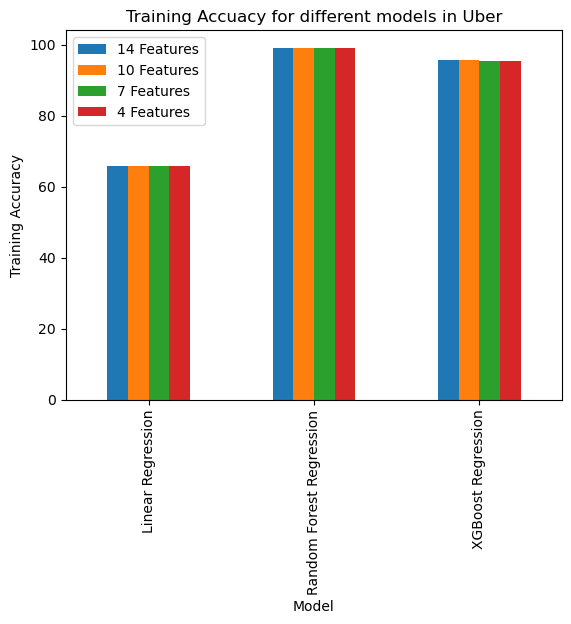

In [230]:
df.plot(x="Model", y=["14 Features", "10 Features", "7 Features", "4 Features"], kind="bar")
plt.title("Training Accuacy for different models in Uber")
plt.xlabel("Model")
plt.ylabel("Training Accuracy")

In [231]:
df1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression', 'XGBoost Regression'],
    '14 Features': [65.85,99.13,95.12],
    '10 Features': [65.85,99.13,95.52],
    '7 Features': [65.85,99.05,95.44],
    '4 Features': [65.84,95.12,95.08]
})

Text(0, 0.5, 'Training Accuracy')

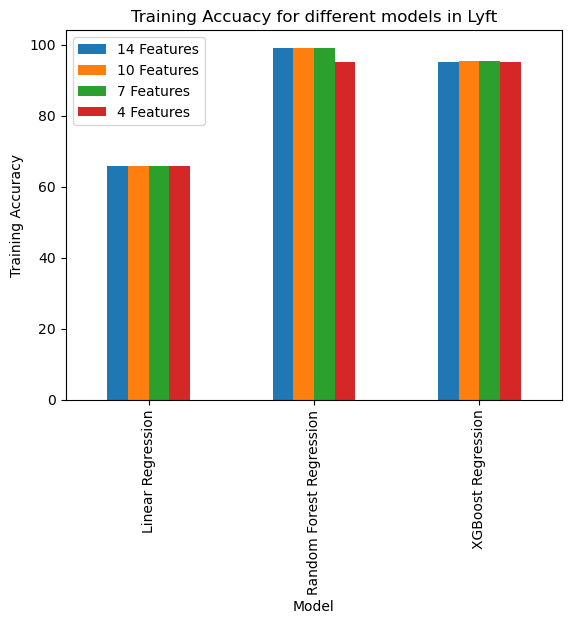

In [232]:
df1.plot(x="Model", y=["14 Features", "10 Features", "7 Features", "4 Features"], kind="bar")
plt.title("Training Accuacy for different models in Lyft")
plt.xlabel("Model")
plt.ylabel("Training Accuracy")

## Performance Test Results

In [233]:
df2 = pd.DataFrame({
    'Evaluation Metrics': ['MAE', 'MSE', 'RMSE', 'R2 Score'],
    'Linear Regression': [4.22,25.98,5.07,0.64],
    'Random Forest Regression': [1.11,3.85,1.96,0.94],
    'Ridge Regression': [4.22,25.98,5.096,0.64],
    'Lasso Regression': [4.16,26.47,5.14,0.63],
    'ElasticNet Regression': [4.17,27.08,5.2,0.62],
    'XGBoost Regression': [1.1,3.7,1.94,0.94]
})

Text(0, 0.5, 'Test Accuracy')

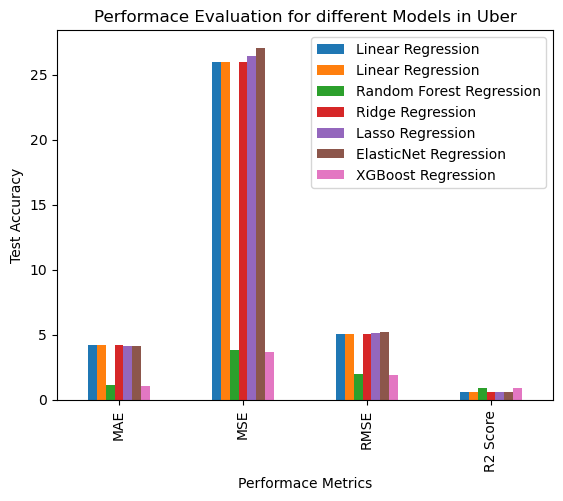

In [234]:
df2.plot(x="Evaluation Metrics", y=["Linear Regression", "Linear Regression", "Random Forest Regression", "Ridge Regression",'Lasso Regression','ElasticNet Regression','XGBoost Regression'], kind="bar")
plt.title("Performace Evaluation for different Models in Uber")
plt.xlabel("Performace Metrics")
plt.ylabel("Test Accuracy")

In [235]:
df3 = pd.DataFrame({
    'Evaluation Metrics': ['MAE', 'MSE', 'RMSE', 'R2 Score'],
    'Linear Regression': [4.22,25.98,5.07,0.64],
    'Random Forest Regression': [1.11,3.85,1.96,0.94],
    'Ridge Regression': [4.22,25.98,5.096,0.64],
    'Lasso Regression': [4.16,26.47,5.14,0.63],
    'ElasticNet Regression': [4.17,27.08,5.2,0.62],
    'XGBoost Regression': [1.1,3.7,1.94,0.94]
})

Text(0, 0.5, 'Test Accuracy')

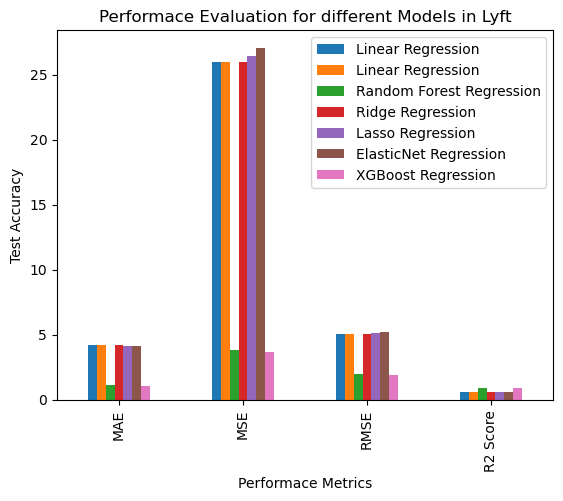

In [237]:
df3.plot(x="Evaluation Metrics", y=["Linear Regression", "Linear Regression", "Random Forest Regression", "Ridge Regression",'Lasso Regression','ElasticNet Regression','XGBoost Regression'], kind="bar")
plt.title("Performace Evaluation for different Models in Lyft")
plt.xlabel("Performace Metrics")
plt.ylabel("Test Accuracy")